# Notebook para el Asistente Virtual

### Elaborado por Alvaro Zambrana Sejas
### Universidad Mayor de San Simón
### 2024

Entrenamiento local con YOLO utilizando un dataset personalizado.

Requirements:
- Anaconda
- Python 3.10 

Configurar:
```
conda create -n copiloto-virtual python=3.10
conda activate copiloto-virtual
``` 

In [1]:
!python --version

Python 3.10.15


In [2]:
!nvidia-smi

Tue Nov 26 05:39:45 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 566.03                 Driver Version: 566.03         CUDA Version: 12.7     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3090      WDDM  |   00000000:01:00.0  On |                  N/A |
| 36%   39C    P8             30W /  350W |    2390MiB /  24576MiB |      1%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

### Download repo and installing required packages

In [3]:
import os
%cd ..

HOME = os.getcwd()
parent_dir = os.path.dirname(HOME)
print(f'HOME: {HOME}')

import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

C:\Users\Alvaro\PycharmProjects\copilotoVirtual
HOME: C:\Users\Alvaro\PycharmProjects\copilotoVirtual


C:\apps\anaconda3\envs\copiloto-virtual\lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [4]:
!pip install ultralytics supervision -q

import ultralytics
ultralytics.checks()

Ultralytics 8.3.37  Python-3.10.15 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3090, 24575MiB)
Setup complete  (12 CPUs, 31.9 GB RAM, 766.2/953.0 GB disk)


In [5]:
# !git clone https://github.com/THU-MIG/yolov10.git
# %cd yolov10
# !pip install .
# %cd ..

In [6]:
!pip install huggingface_hub


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
!yolo -version

8.3.37


### Downloading pretrained weights

# Inferencia utilizando el model de YOLOv11 pre-entrenado

In [8]:
!cd {HOME}
!yolo task=detect mode=predict conf=0.25 save=True model={HOME}/weights/yolov10n.pt source=".\\dataset\\yolo_signals_cbba_with_augmented_data\\test\\images\\2024_09_08_17_28_09_150_-0400_1280x1280.right-region.jpg"

Ultralytics 8.3.37 ðŸš€ Python-3.10.15 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3090, 24575MiB)
YOLOv10n summary (fused): 285 layers, 2,762,608 parameters, 63,840 gradients, 8.6 GFLOPs

image 1/1 C:\Users\Alvaro\PycharmProjects\copilotoVirtual\dataset\yolo_signals_cbba_with_augmented_data\test\images\2024_09_08_17_28_09_150_-0400_1280x1280.right-region.jpg: 640x640 1 0, 2 2s, 1 5, 21.5ms
Speed: 6.0ms preprocess, 21.5ms inference, 28.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict12
ðŸ’¡ Learn more at https://docs.ultralytics.com/modes/predict


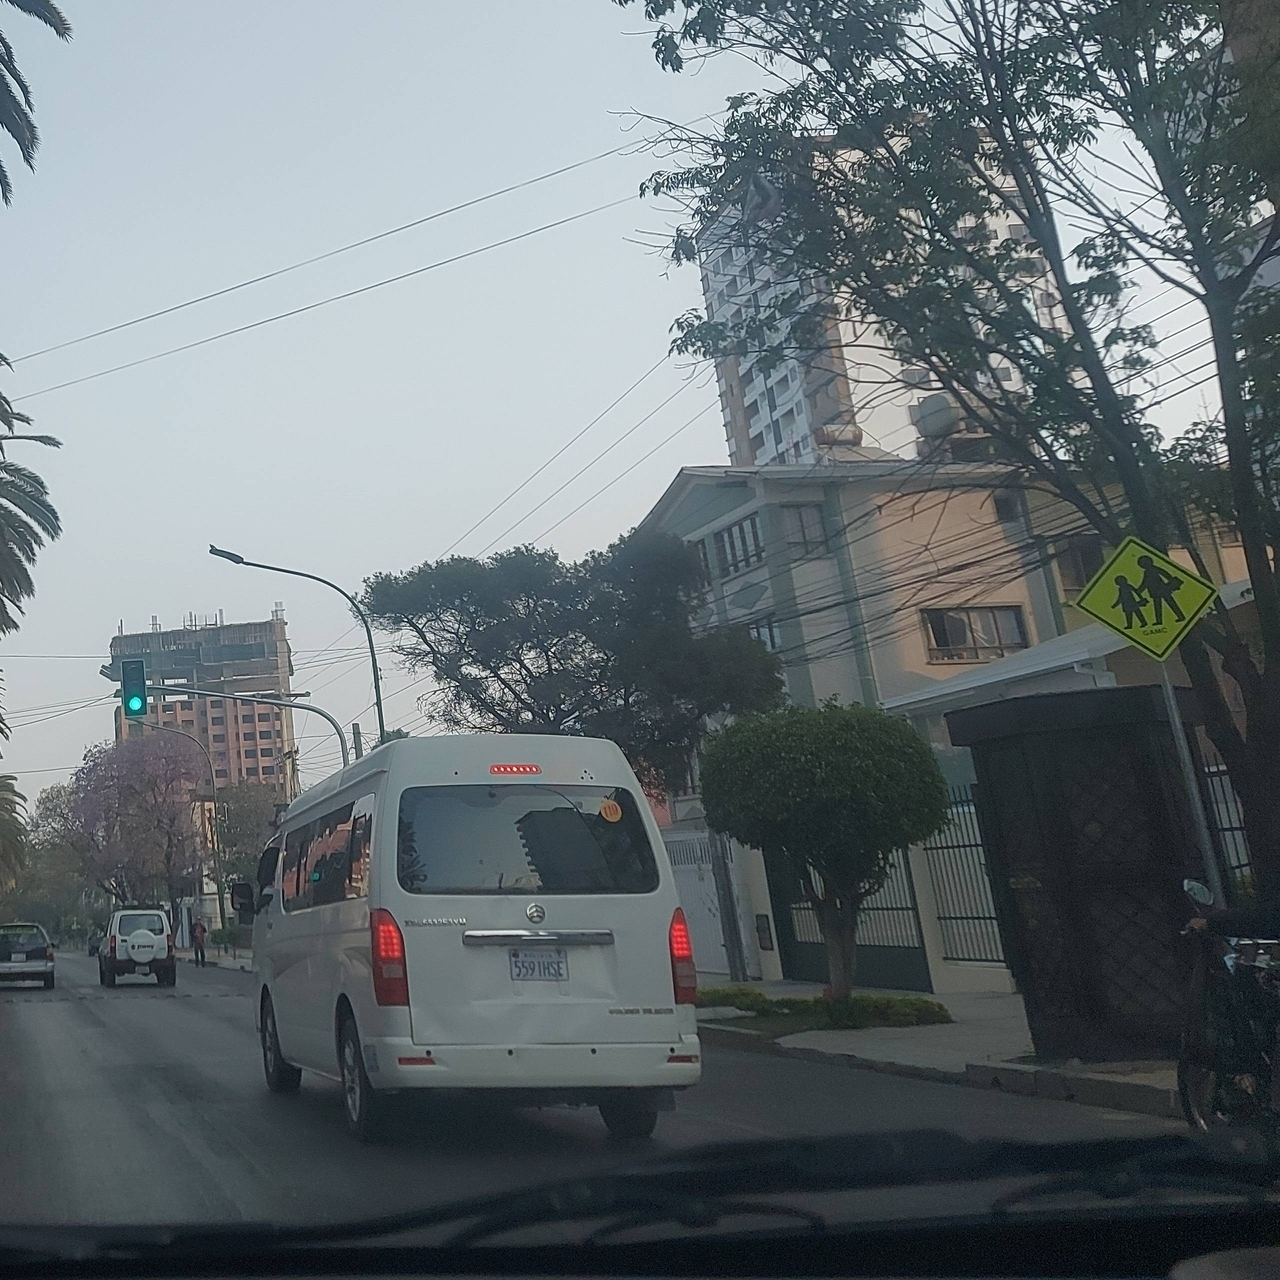

In [9]:
from IPython.display import Image

Image(filename=f".\\dataset\\yolo_signals_cbba_with_augmented_data\\test\\images\\2024_09_08_17_28_09_150_-0400_1280x1280.right-region.jpg", height=640)

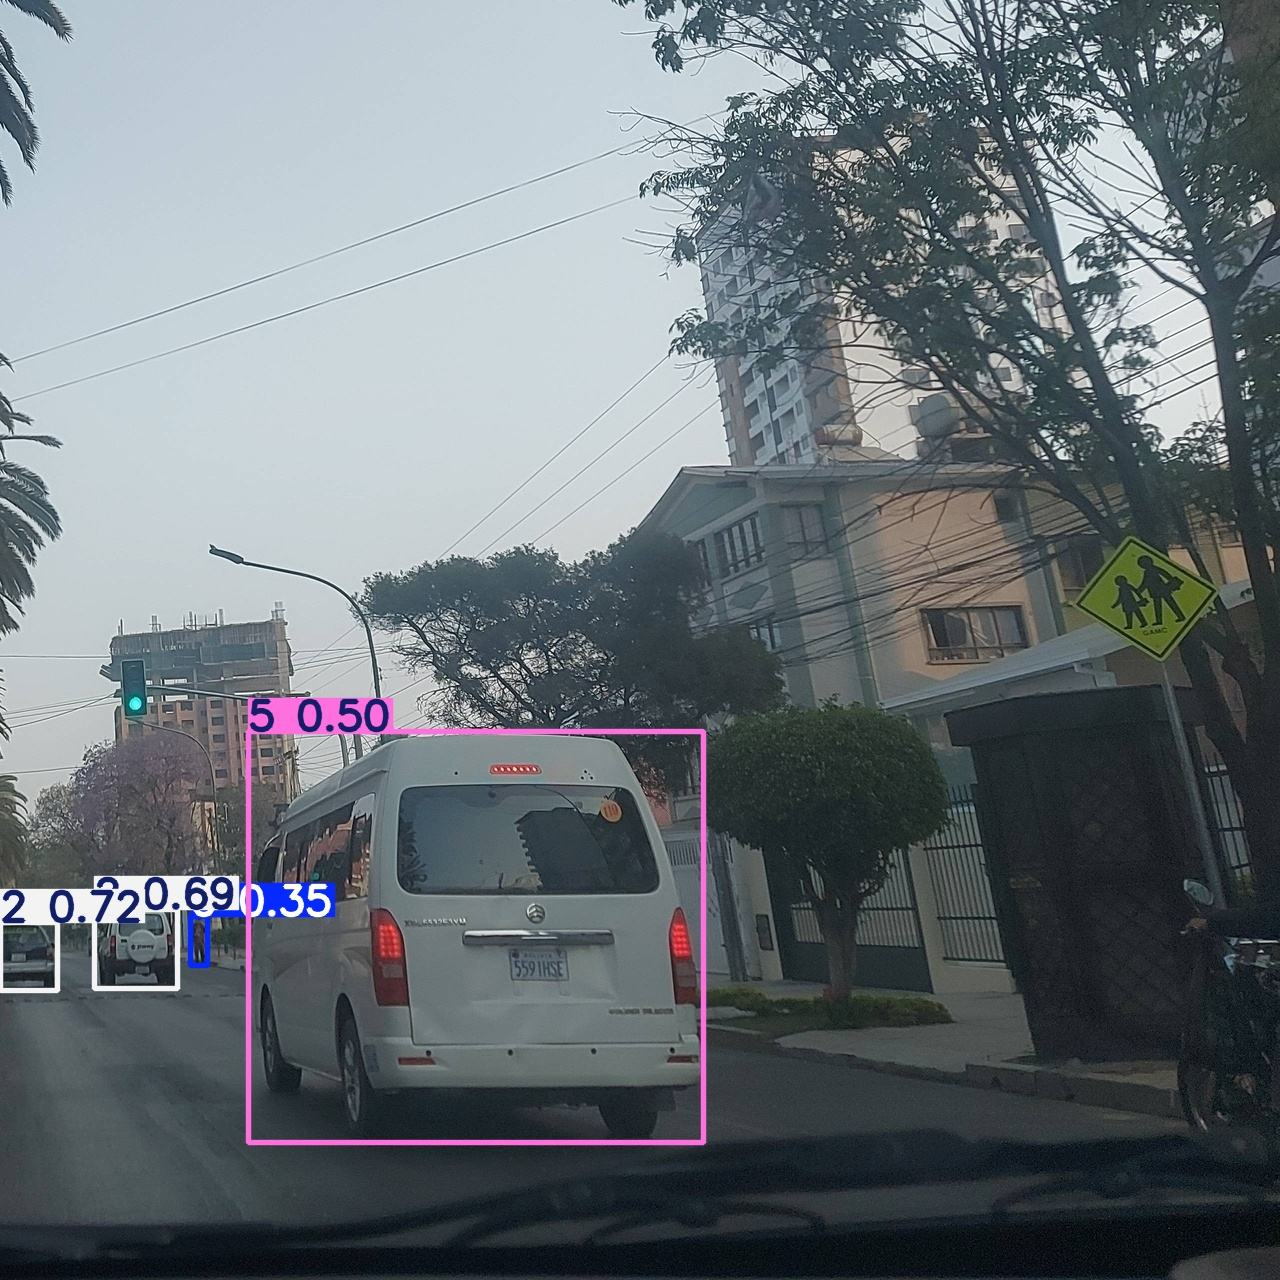

In [10]:
from IPython.display import Image

# Display the detected image
Image(filename=f".\\runs\\detect\\predict12\\2024_09_08_17_28_09_150_-0400_1280x1280.right-region.jpg", height=640)

# Train Custom Model

In [11]:
import torch
print(torch.cuda.is_available())

True


In [12]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2024 NVIDIA Corporation
Built on Wed_Aug_14_10:26:51_Pacific_Daylight_Time_2024
Cuda compilation tools, release 12.6, V12.6.68
Build cuda_12.6.r12.6/compiler.34714021_0


In [13]:
torch.version.cuda

'12.4'

In [14]:
import ultralytics

ultralytics.checks()

Ultralytics 8.3.37  Python-3.10.15 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3090, 24575MiB)
Setup complete  (12 CPUs, 31.9 GB RAM, 766.2/953.0 GB disk)


In [13]:
!pip install albumentations==1.4

  Using cached albumentations-1.4.0-py3-none-any.whl.metadata (35 kB)
Using cached albumentations-1.4.0-py3-none-any.whl (123 kB)
  Attempting uninstall: albumentations
    Found existing installation: albumentations 1.4.17
    Uninstalling albumentations-1.4.17:
      Successfully uninstalled albumentations-1.4.17


In [16]:
# Set YOLO to quiet mode
os.environ['YOLO_VERBOSE'] = 'True'
os.environ['NO_ALBUMENTATIONS_UPDATE'] = '1'

%cd {HOME}


!yolo task=detect mode=train epochs=300 batch=32 plots=True model='./weights/yolo11n.pt' data="./dataset/yolo_signals_cbba_with_augmented_data/data.yaml" device=0



C:\Users\Alvaro\PycharmProjects\copilotoVirtual
Ultralytics 8.3.37 ðŸš€ Python-3.10.15 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3090, 24575MiB)
engine\trainer: task=detect, mode=train, model=./weights/yolo11n.pt, data=./dataset/yolo_signals_cbba_with_augmented_data/data.yaml, epochs=300, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train24, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_f


train: Scanning C:\Users\Alvaro\PycharmProjects\copilotoVirtual\dataset\yolo_signals_cbba\train\labels.cache... 816 images, 0 backgrounds, 0 corrupt: 100%|##########| 816/816 [00:00<?, ?it/s]
train: Scanning C:\Users\Alvaro\PycharmProjects\copilotoVirtual\dataset\yolo_signals_cbba\train\labels.cache... 816 images, 0 backgrounds, 0 corrupt: 100%|##########| 816/816 [00:00<?, ?it/s]

val: Scanning C:\Users\Alvaro\PycharmProjects\copilotoVirtual\dataset\yolo_signals_cbba\val\labels.cache... 235 images, 0 backgrounds, 0 corrupt: 100%|##########| 235/235 [00:00<?, ?it/s]
val: Scanning C:\Users\Alvaro\PycharmProjects\copilotoVirtual\dataset\yolo_signals_cbba\val\labels.cache... 235 images, 0 backgrounds, 0 corrupt: 100%|##########| 235/235 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]
      1/300      4.52G      1.454       6.36      1.087         46        640:   0%|          | 0/26 [00:01<?, ?it/s]
      1/300      4.52G      1.454       6.36      1.087         46        640:  

# Inference

In [17]:
!yolo task=detect mode=predict conf=0.25 save=True model=./runs/detect/train24/weights/best.pt source=C:\Users\Alvaro\PycharmProjects\copilotoVirtual\dataset\yolo_signals_cbba_with_augmented_data\test\images\2024_10_01_12_40_45_425_-0400_1280x1280.right-region.jpg

Ultralytics 8.3.37 ðŸš€ Python-3.10.15 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3090, 24575MiB)
YOLO11n summary (fused): 238 layers, 2,585,077 parameters, 0 gradients, 6.3 GFLOPs

image 1/1 C:\Users\Alvaro\PycharmProjects\copilotoVirtual\dataset\yolo_signals_cbba_with_augmented_data\test\images\2024_10_01_12_40_45_425_-0400_1280x1280.right-region.jpg: 640x640 1 ceda-el-paso, 13.0ms
Speed: 4.0ms preprocess, 13.0ms inference, 176.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict13
ðŸ’¡ Learn more at https://docs.ultralytics.com/modes/predict


In [18]:
!yolo task=detect mode=predict conf=0.25 save=True model=./runs/detect/train24/weights/best.pt source=C:\Users\Alvaro\PycharmProjects\copilotoVirtual\dataset\external\Screenshot_2024-10-04_001459.png

Ultralytics 8.3.37 ðŸš€ Python-3.10.15 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3090, 24575MiB)
YOLO11n summary (fused): 238 layers, 2,585,077 parameters, 0 gradients, 6.3 GFLOPs

image 1/1 C:\Users\Alvaro\PycharmProjects\copilotoVirtual\dataset\external\Screenshot_2024-10-04_001459.png: 416x640 1 prohibido-girar-izquierda, 79.6ms
Speed: 4.0ms preprocess, 79.6ms inference, 88.2ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs\detect\predict14
ðŸ’¡ Learn more at https://docs.ultralytics.com/modes/predict


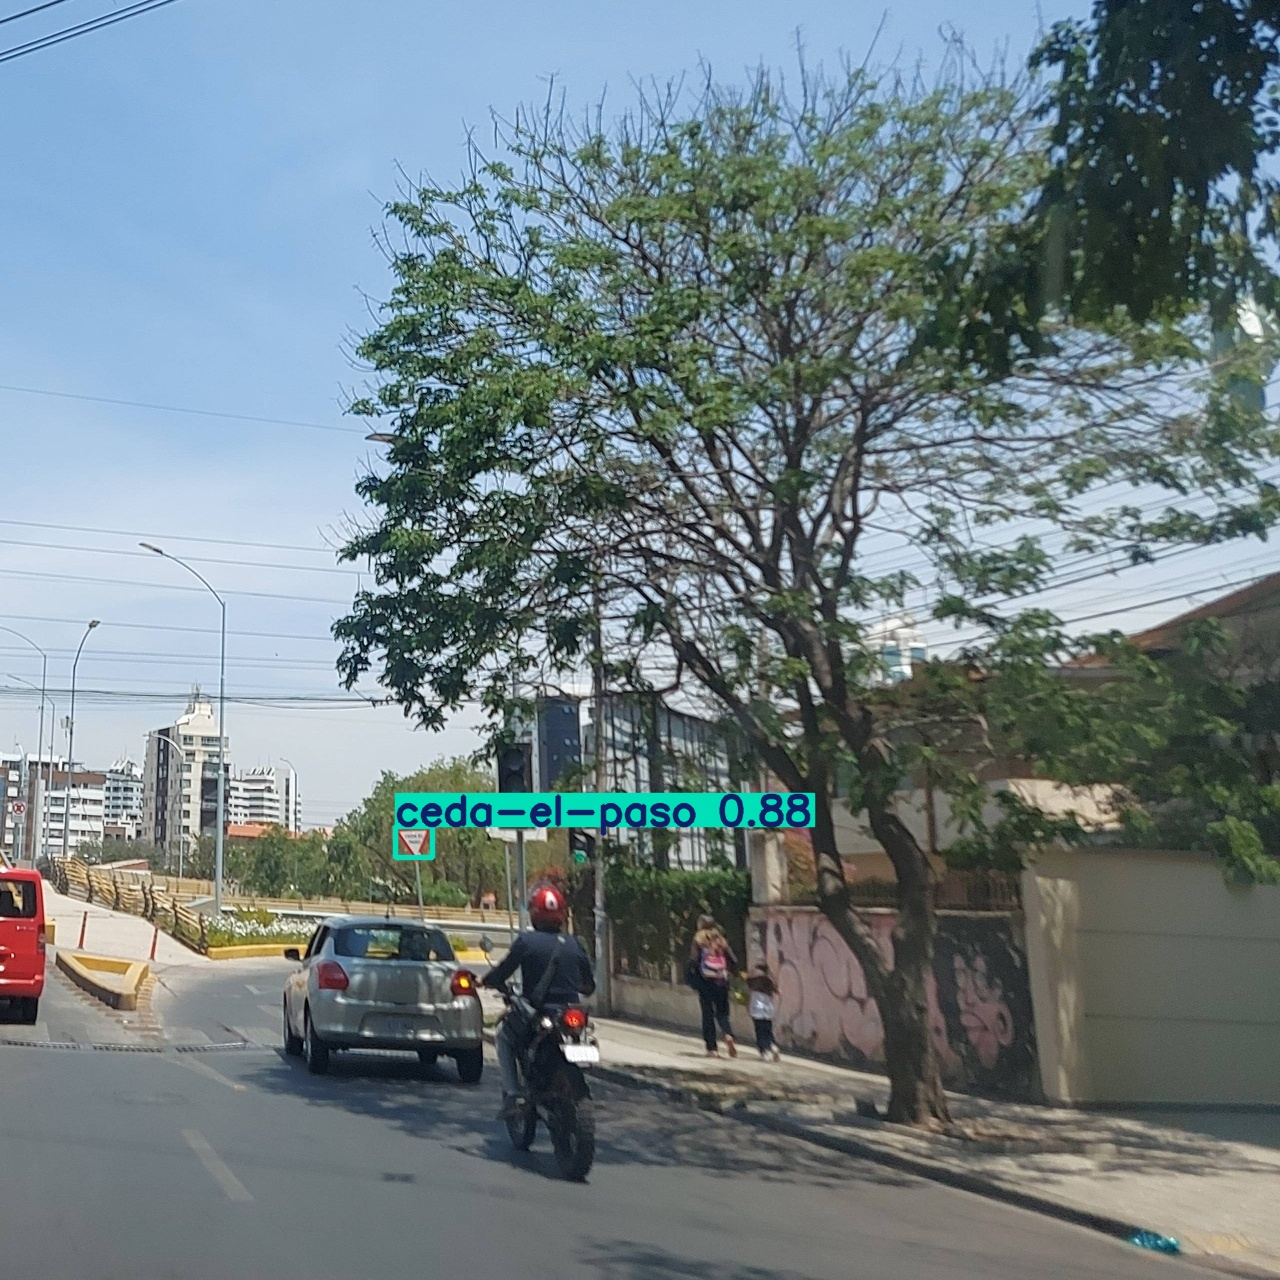

In [19]:
from IPython.display import Image
Image(filename=f"{HOME}\\runs\\detect\\predict13\\2024_10_01_12_40_45_425_-0400_1280x1280.right-region.jpg", height=600)

## Matrices de Confusión

C:\Users\Alvaro\PycharmProjects\copilotoVirtual


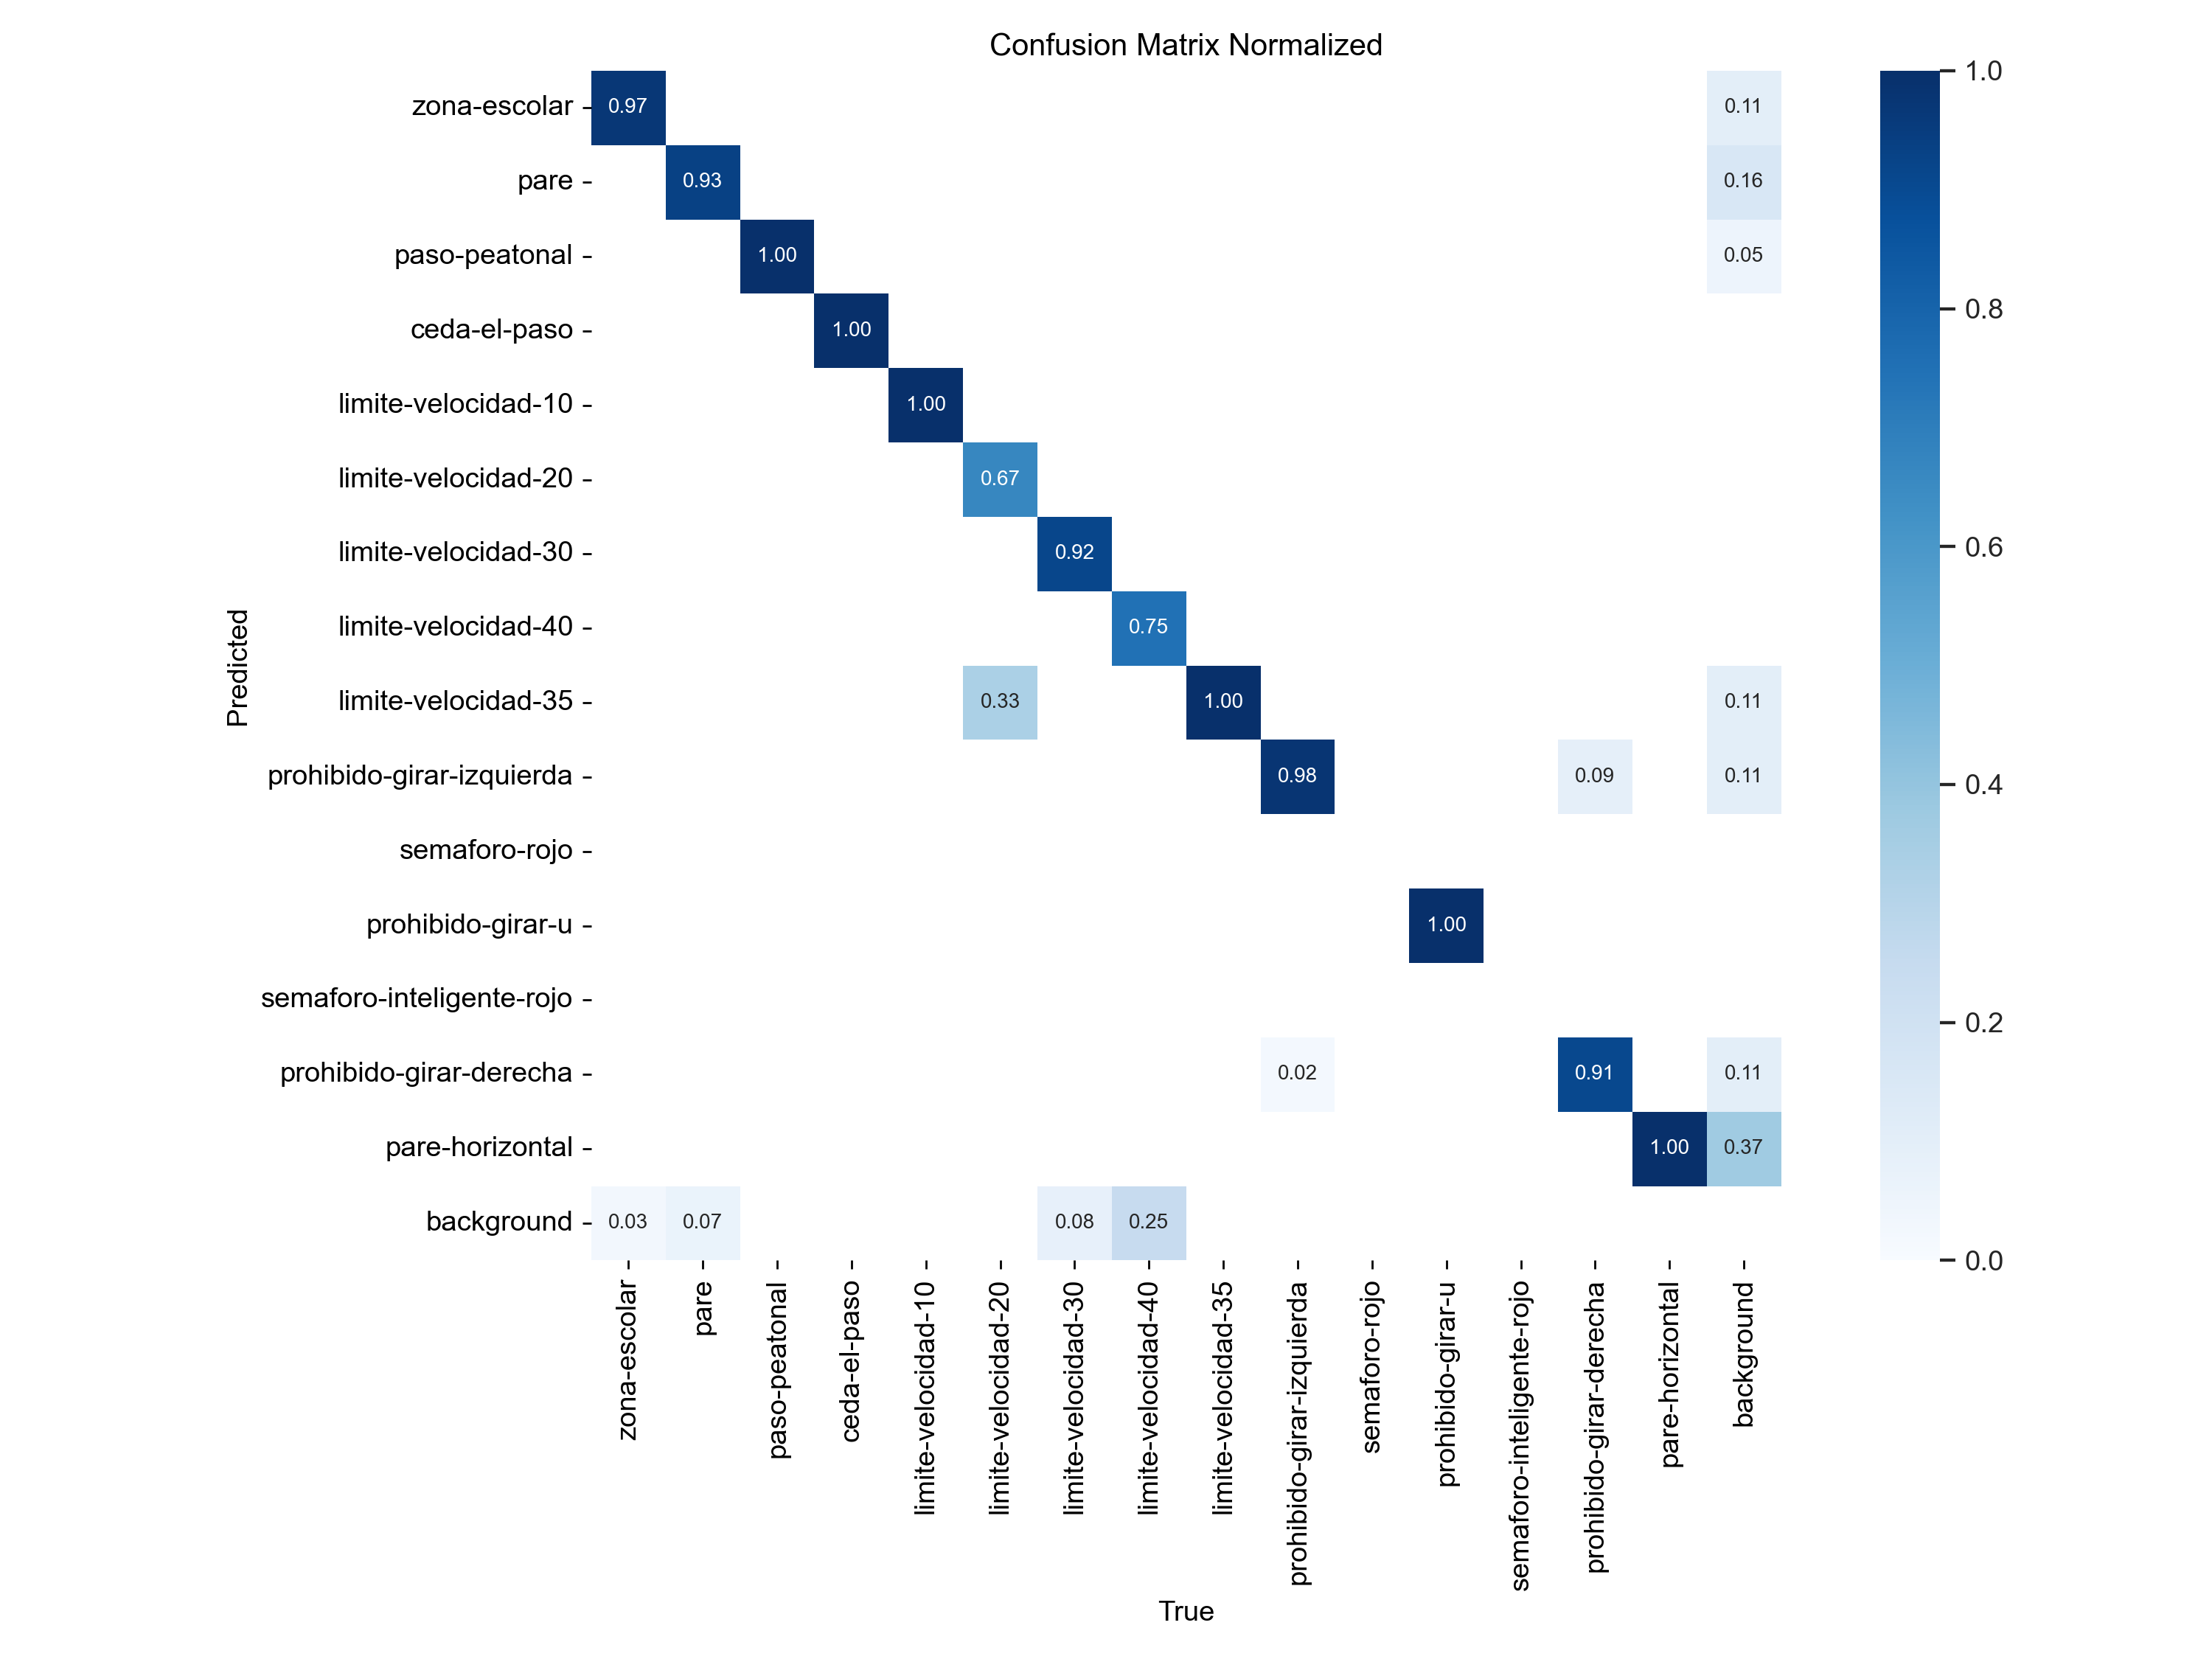

In [20]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train24/confusion_matrix_normalized.png', width=600)


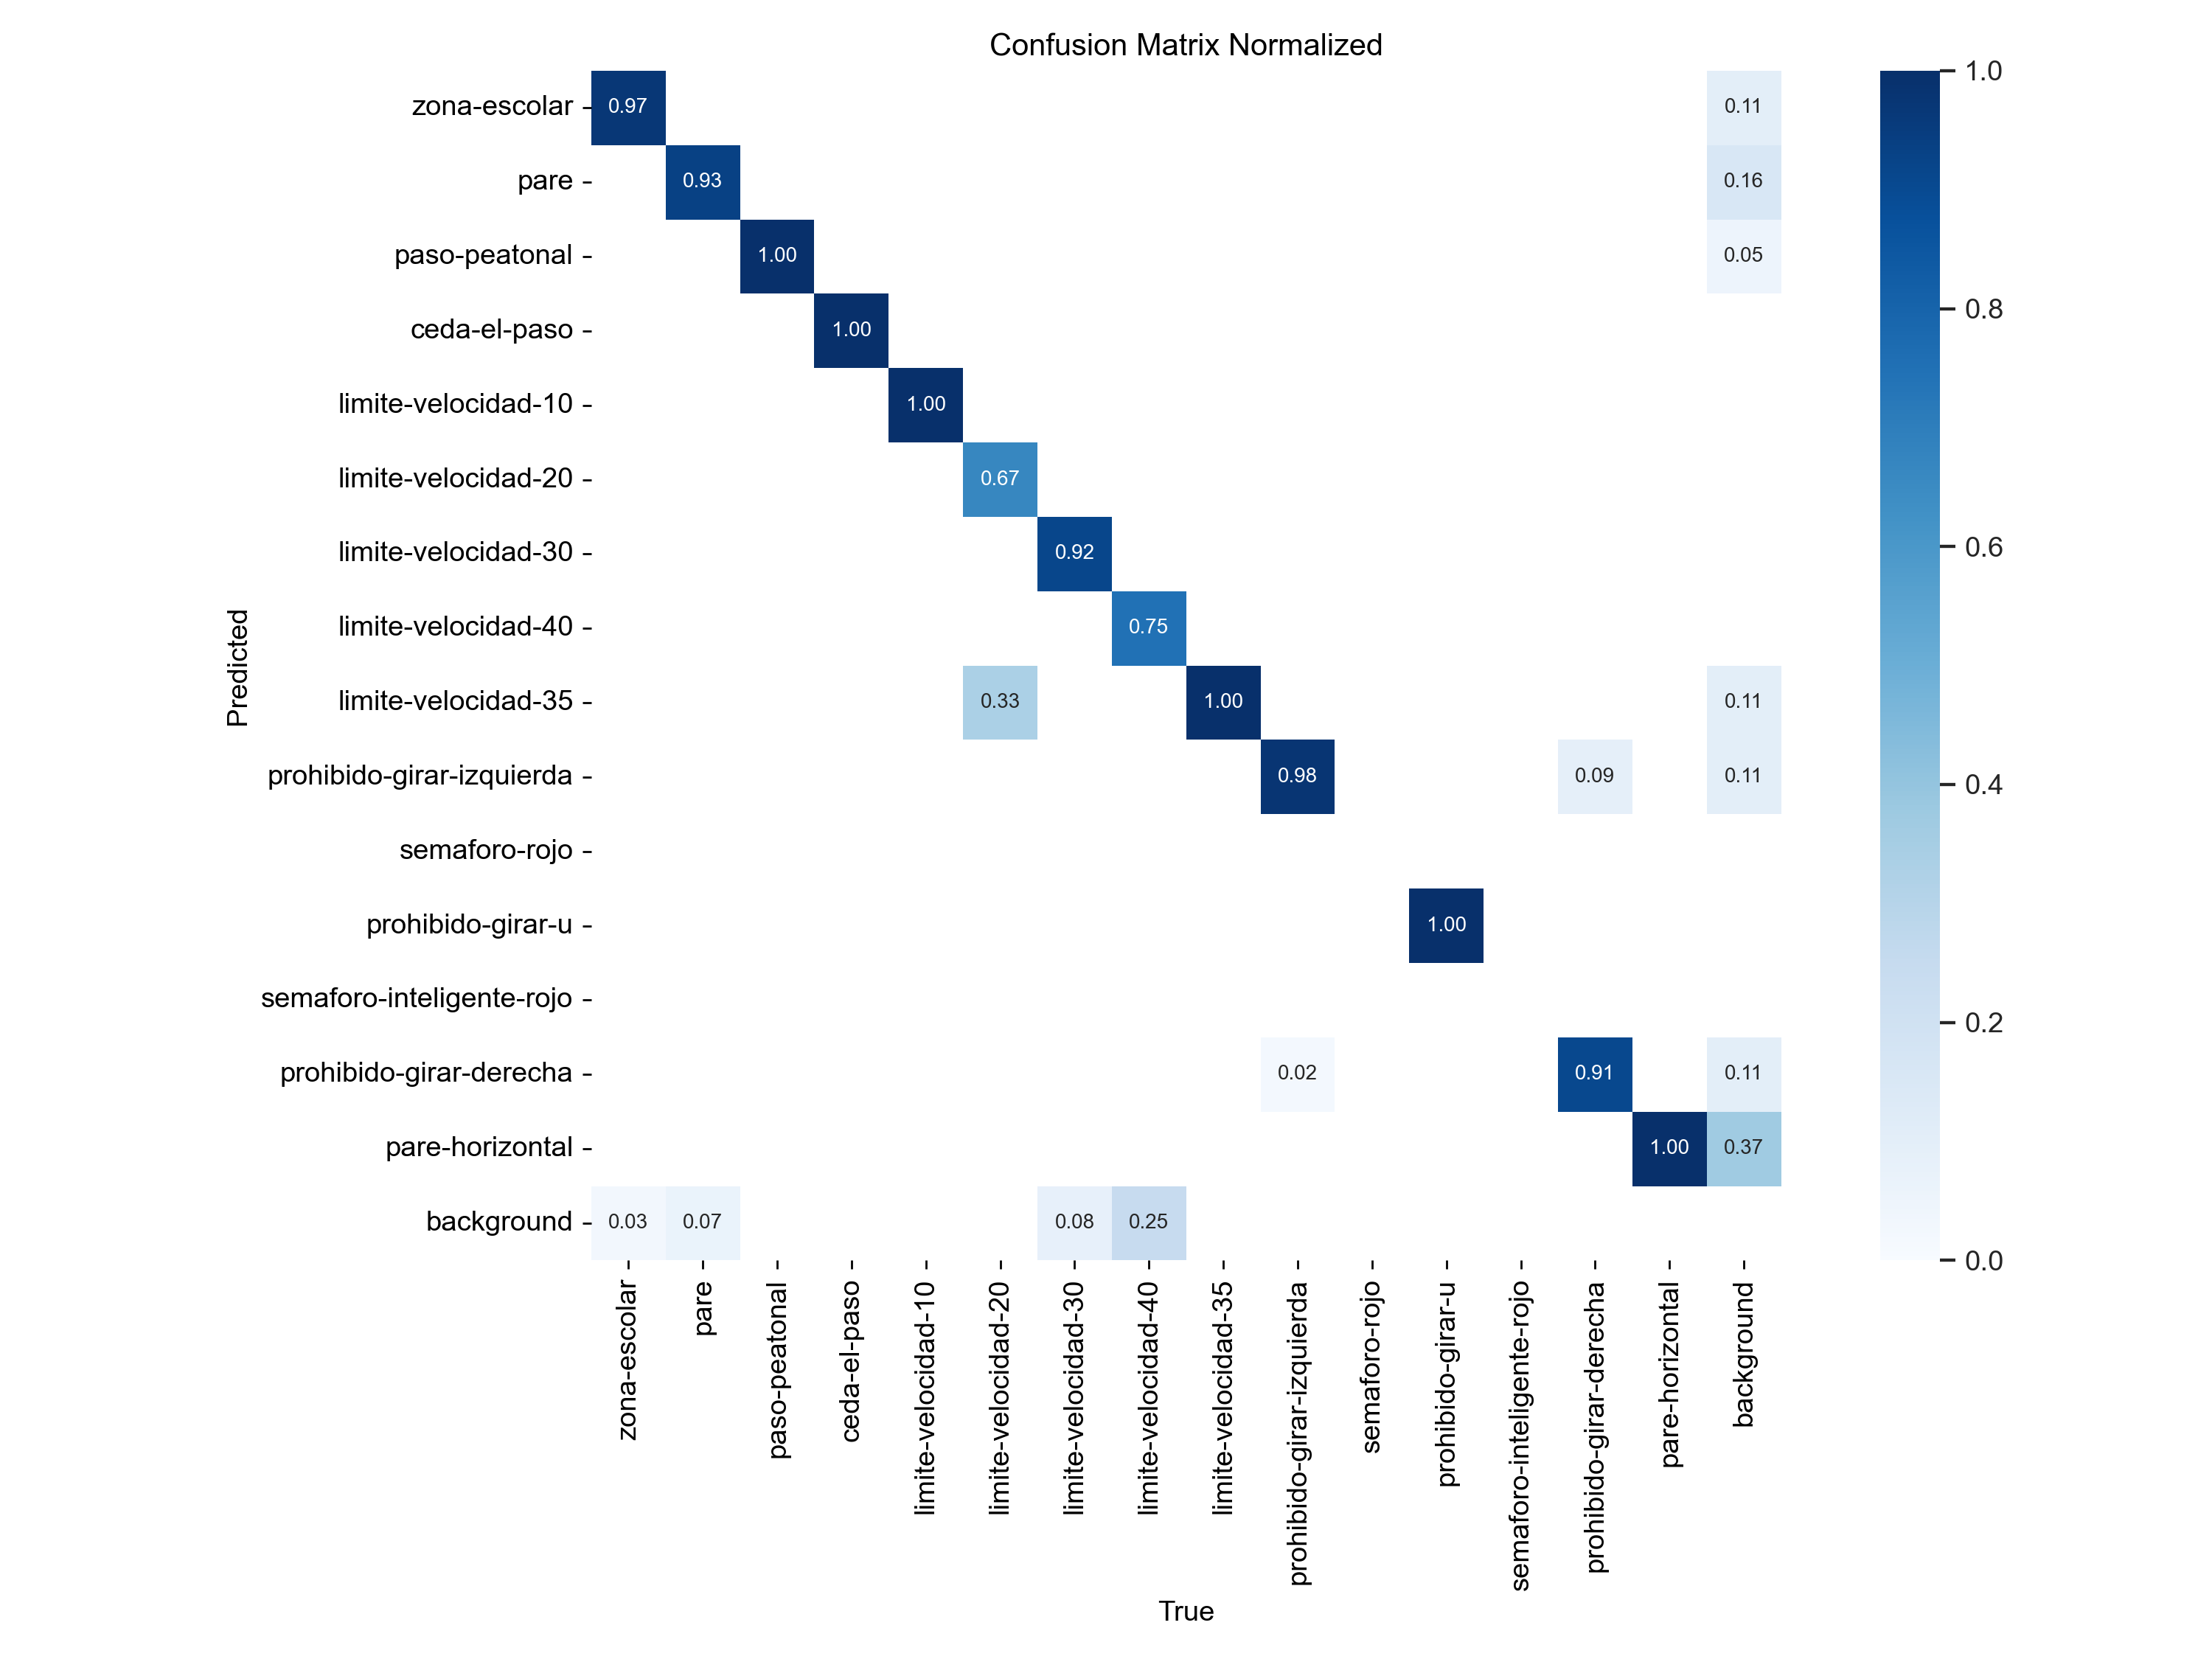

In [21]:
Image(filename=f'{HOME}/runs/detect/train24/confusion_matrix_normalized.png', width=600)


## Exportar modelo

In [22]:
!yolo export model='../runs/detect/train24/weights/best.pt' format=tflite imgsz=640

Ultralytics 8.3.37 ðŸš€ Python-3.10.15 torch-2.5.1+cu124 CPU (Intel Core(TM) i7-8700 3.20GHz)
YOLO11n summary (fused): 238 layers, 2,585,077 parameters, 0 gradients, 6.3 GFLOPs

PyTorch: starting from 'weights\..\runs\detect\train24\weights\best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 19, 8400) (5.3 MB)
requirements: Ultralytics requirement ['tensorflow-cpu>=2.0.0'] not found, attempting AutoUpdate...


In [8]:
#  Export model to tflite

from ultralytics import YOLO

# Load a model
model = YOLO(f'yolo_cbba.pt')  # load a custom trained model
# model.save('yolo_cbba.pt')

# model.export(format="onnx")
# Export the model

# model.save_pretrained(f'{HOME}/runs/detect/train20/weights/best')

model.export(format='tflite')

c:\apps\anaconda3\envs\copiloto-virtual\lib\site-packages\ultralytics\nn\tasks.py:733: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(file, map_location="cp

FileNotFoundError: [Errno 2] No such file or directory: 'yolo_cbba.pt'